meltome-mixed_split-cnn-esm-ensemble.pdf


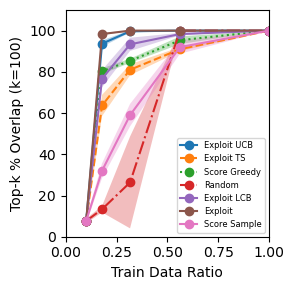

meltome-mixed_split-cnn-esm-evidential.pdf


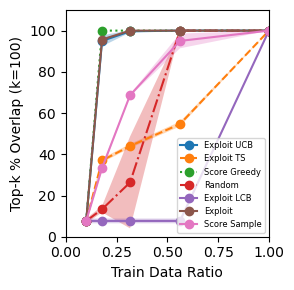

meltome-mixed_split-gp-esm-gp.pdf


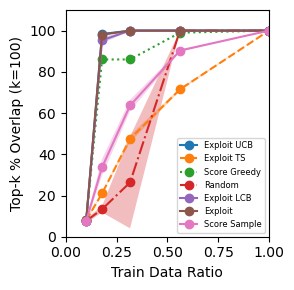

gb1-sampled-cnn-esm-ensemble.pdf


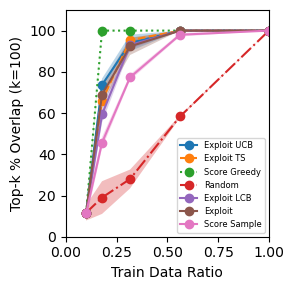

gb1-sampled-cnn-esm-evidential.pdf


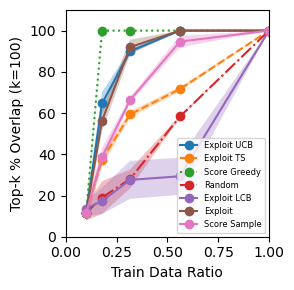

gb1-sampled-gp-esm-gp.pdf


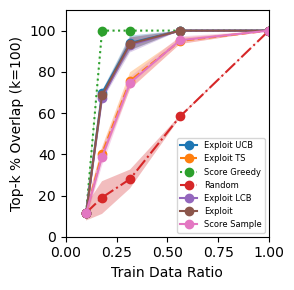

aav-sampled-cnn-esm-ensemble.pdf


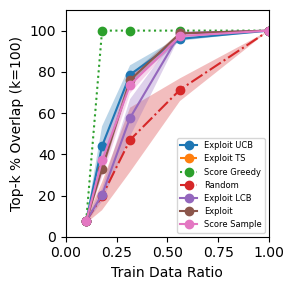

aav-sampled-cnn-esm-evidential.pdf


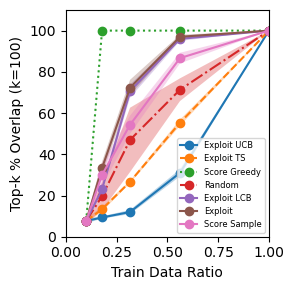

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

al_results_dir = "../src/active_learning/al_results"

results_dirs = []
for rootdir, dirs, files in os.walk(al_results_dir):
    for subdir in dirs:
        results_dirs.append(os.path.join(rootdir, subdir))

results_dirs = [s.split('/') for s in results_dirs]
results_dirs = [l[4:] for l in results_dirs if ((len(l)==9 and "dropout" not in l) or (len(l)==10 and "dropout" in l))]

for dir_names in results_dirs:
    
    if dir_names[4] == "dropout":
        results_dir = al_results_dir+f"/{dir_names[0]}/{dir_names[1]}/{dir_names[2]}/{dir_names[3]}/{dir_names[4]}/{dir_names[5]}/"
    else:
        results_dir = al_results_dir+f"/{dir_names[0]}/{dir_names[1]}/{dir_names[2]}/{dir_names[3]}/{dir_names[4]}/"
    
    fig_name = f"{dir_names[0]}-{dir_names[1]}-{dir_names[2]}-{dir_names[3]}-{dir_names[4]}.pdf"
    main_fig_names = [
        "aav-sampled-cnn-esm-ensemble.pdf",
        "meltome-mixed_split-gp-esm-gp.pdf",
        "gb1-sampled-gp-esm-gp.pdf",
        "meltome-mixed_split-cnn-esm-evidential.pdf",
        "meltome-mixed_split-cnn-esm-ensemble.pdf",
        "gb1-sampled-cnn-esm-ensemble.pdf",
        "aav-sampled-cnn-esm-evidential.pdf",
        "gb1-sampled-cnn-esm-evidential.pdf",
    ]
    if fig_name in main_fig_names:
        print(fig_name)
        csv_list = [s for s in os.listdir(results_dir) if s.endswith(".csv")]

        try:
            df = pd.read_csv(f"{results_dir}{csv_list[0]}")
        except:
            continue

        for csv in csv_list[1:]:
            df = pd.concat([df, pd.read_csv(f"{results_dir}{csv}")])

        df.sort_values(["Strategy", "Trial"], inplace=True)

        f = plt.figure(figsize=(3,3))

        for strategy in ["exploit_ucb", "exploit_ts", "score_greedy", "random", "exploit_lcb", "exploit", "score_sample"]:
            if strategy=="exploit_ucb":
                plotstyle = 'o-'
                strategy_label = "Exploit UCB"
            elif strategy=="exploit_ts":
                plotstyle = 'o--'
                strategy_label = "Exploit TS"
            elif strategy=="score_greedy":
                plotstyle = 'o:'
                strategy_label = "Score Greedy"
            elif strategy=="random":
                plotstyle = 'o-.'
                strategy_label = "Random"
            elif strategy=="exploit_lcb":
                plotstyle = 'o-'
                strategy_label = "Exploit LCB"
            elif strategy=="exploit":
                plotstyle = 'o-'
                strategy_label = "Exploit"
            elif strategy=="score_sample":
                plotstyle = 'o-'
                strategy_label = "Score Sample"
            
            df_mean = df.loc[(df.Strategy==strategy)].groupby("Train Data Ratio").mean()
            df_std = df.loc[(df.Strategy==strategy)].groupby("Train Data Ratio").std()

            plt.subplot(1, 1, 1)
            plt.plot(df_mean.index, df_mean.TopKPercentOverlap, plotstyle, label=strategy_label)
            plt.fill_between(df_mean.index, df_mean.TopKPercentOverlap-df_std.TopKPercentOverlap, df_mean.TopKPercentOverlap+df_std.TopKPercentOverlap, alpha=0.3)
        
        plt.xlabel("Train Data Ratio")
        plt.ylabel("Top-k % Overlap (k=100)")
        
        plt.xlim(0,1)
        plt.ylim(0,110)
        plt.legend(loc="lower right", fontsize=6)
        
        f.tight_layout()

        plt.savefig(f"bo_figures/main9/{fig_name}", 
                    facecolor='white')
        plt.show()